In [ ]:
import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") # contains the detail of week 1 customer
week2=pd.read_csv("Restaurant - Week 2 Sales.csv")# contains the detail of week 2 customer

customers =pd.read_csv("Restaurant - Customers.csv")# Customer what they have ordered
foods=pd.read_csv("foods.csv")#Food id information

In [ ]:
week1.head()

In [ ]:
week2.head()

In [ ]:
customers.head()

In [ ]:
foods

In [ ]:
# so here we have two csv week 1 and week 2 which containing same information 
# so if we will going to merge then we need to work on only one df
pd.concat(objs=[week1,week2])
# here by default parameter is false for ignore this we need to make it True so that we can see 499 index 
pd.concat(objs=[week1,week2],ignore_index=False)
pd.concat(objs=[week1,week2],ignore_index=True)

# The pd.concat() Method,Part -2

In [ ]:
#  another way is to do so but index should not be changed
sales =pd.concat(objs=[week1,week2],keys=["week1","week2"])
#keys meaning is the things should be fixed

In [ ]:
# this will helps us to etract the data so with .iloc function we can do
sales.loc[("week1",)]
sales.loc[("week2",)]


sales.loc[("week1",240)]
sales.loc[("week2",240,)]

In [ ]:
# if we want the data in more granular way
sales.loc[("week2",240,),"Customer ID"]
sales.loc[("week2",240,),"Food ID"]

In [ ]:
sales.loc[("week2",240,),["Customer ID","Food ID"]]

# Inner Join

In [ ]:
week1.head()

In [ ]:
week2.head()

In [ ]:
#how->means which join operation they need to implement
#on->one which column it will going to implement the id should be match in both the data set.

week1.merge(week2,how="inner",on="Customer ID")

In [ ]:
#so why 155 is getting repeating
# cause if we are looking both the tables data

week1[week1["Customer ID"]==155]

In [ ]:

week2[week2["Customer ID"]==155]

In [ ]:
# beacuse of that it is showing the duplicate result in first week1 the customer no 155 ordered two item and in the second week 
#the same client booked only one time so with the help of inner join they both collate and showing the (9,3) and (1,9)

In [ ]:
# the another thing this suffix _x and _y is not looks good
week1.merge(week2,how="inner",on="Customer ID",suffixes=[" - week1"," - week2"])

In [ ]:
#another use case 
week1.merge(week2,how="inner",on=["Customer ID","Food ID"])
# here the only duplicacy in customer id =21


In [ ]:
week1[week1["Customer ID"]==21]

In [ ]:
week2[week2["Customer ID"]==21]

In [ ]:
# this is the reason we are getting the duplicate result

# Outer Joins-> it will provide all combination
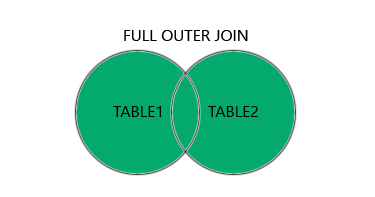

In [ ]:
week1.merge(week2,how="outer",on="Customer ID",suffixes=[" - week1"," - week2"])
# the values are coming in decimal because of NaN - pandas need to store in decimal

In [ ]:
len(week1.merge(week2,how="outer",on="Customer ID",suffixes=[" - week1"," - week2"]))

In [ ]:
500-454
# only 46 records which are  matching.

In [ ]:
# one more functionality we can use which is indicator that helps us to indicate the data is coming from which table
merged=week1.merge(week2,how="outer",on="Customer ID",suffixes=[" - week1"," - week2"],indicator=True)
merged.head()

In [ ]:
merged["_merge"].value_counts()

# 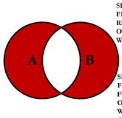

In [ ]:
merged[merged["_merge"].isin(["left_only","right_only"])]

# Left Join

In [ ]:
import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") # contains the detail of week 1 customer
week2=pd.read_csv("Restaurant - Week 2 Sales.csv")# contains the detail of week 2 customer

customers =pd.read_csv("Restaurant - Customers.csv")# Customer what they have ordered
foods=pd.read_csv("Restaurant - Foods.csv")#Food id information

In [ ]:
week1.head()

In [ ]:
foods.head()

In [ ]:
week1.merge(foods,how="left",on="Food ID",indicator=True,sort=True)

In [ ]:
week1[week1["Food ID"]==1]

In [ ]:
foods[foods["Food ID"]==1]

# The left_on and right_on Parameter

In [ ]:
# Till now we have the same column name in both the tables but that is not a case each and evey time 
# In that case we need to use left_on parameter so that we can indicate left table name
# for the right hand side table also same kind of parameter right_on parameter we have to use 

import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") # contains the detail of week 1 customer
week2=pd.read_csv("Restaurant - Week 2 Sales.csv")# contains the detail of week 2 customer

customers =pd.read_csv("Restaurant - Customers.csv")# Customer what they have ordered
foods=pd.read_csv("Restaurant - Foods.csv")#Food id information


In [ ]:
week2.head()

In [ ]:
customers.head()

In [ ]:
week2.merge(customers,how="inner",left_on="Customer ID",right_on="ID")

In [ ]:
#so now the ID and Customer ID both column is there so i need to remove one column beacuse there is no use to keep all the column
week2.merge(customers,how="inner",left_on="Customer ID",right_on="ID").drop("ID",axis="columns")

# Merging by indexes with left_index and right_index Parameter

In [ ]:
import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") 
-week2=pd.read_csv("Restaurant - Week 2 Sales.csv")
customers=pd.read_csv("Restaurant - Customers.csv",index_col="ID")
foods=pd.read_csv("Restaurant - Foods.csv",index_col="Food ID")

In [ ]:
customers.head()

In [ ]:
foods.head()

In [ ]:
week1.head()

In [ ]:
week2.head()

In [ ]:
week1.merge(week2,how="left",left_index=True,right_index=True,suffixes=[" - Week 1"," - Week 2"])

In [ ]:
week1.merge(customers,how="left",left_on="Customer ID",right_index=True)

# The .Join Method

In [ ]:
import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") 
week2=pd.read_csv("Restaurant - Week 2 Sales.csv")
customers=pd.read_csv("Restaurant - Customers.csv")
foods=pd.read_csv("Restaurant - Foods.csv")
satisfaction=pd.read_csv("Restaurant - Week 1 Satisfaction.csv")

In [ ]:
week1.head()

In [ ]:
satisfaction.head()

In [135]:
week1.merge(satisfaction,how="left",left_index=True,right_index=True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [137]:
#Join Method Preferably used when u are adding the indexs
week1.join(satisfaction)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


# The pd.merge()

In [139]:
# we can directly join the dataframe using the .merge()
#first two parameter will be left table and right table 
import pandas as pd
week1=pd.read_csv("Restaurant - Week 1 Sales.csv") 
week2=pd.read_csv("Restaurant - Week 2 Sales.csv")
customers=pd.read_csv("Restaurant - Customers.csv")
foods=pd.read_csv("Restaurant - Foods.csv")
satisfaction=pd.read_csv("Restaurant - Week 1 Satisfaction.csv")

In [141]:
week1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


In [142]:
customers.head()

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant


In [143]:
pd.merge(week1,customers,how="left",left_on="Customer ID",right_on="ID")

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,537,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,97,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,658,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,202,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,155,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...,...
245,413,9,413,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,926,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,134,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,396,Juan,Romero,Male,Zoonder,Analyst Programmer
